## Example 3: Parameterized N-qubit QFT

### Purpose

This example shows how we can take the 4-qubit Quantum Fourier Transform (QFT) from the previous example and turn it into a parameterized QFT that can handle an arbitrary number of qubits. This is done using Python code to build the circuit. It also has a parameter that allows the QFT to be applied to a sub-range of the circuit qubits. 

This QFT will be used in a subsequent example notebook on quantum phase estimation.

In [1]:
PI = '\u03C0'  # PI unicode
from math import pi

import numpy as np

from tinyqsim.qcircuit import QCircuit

### Define an N-qubit QFT

An N-qubit QFT requires a different number and configuration of quantum gates depending on the value of N. We can solve this by defining a Python function to generate the quantum circuit instead of adding the gates explicitly.

The function has two parameters: one for the size of the QFT and the other for the first qubit at which it is applied.

In [2]:
def qft(qc, n: int, start: int = 0):
    """ N-qubit QFT starting at qubit index 'start'."""
    for i in range(n):
        j = i + start
        qc.h(j)
        for k in range(1, n - i):
            qc.cp(pi / 2 ** k, f'{PI}/{2 ** k}', j, j + k)
    for i in range(n // 2):  # Reverse order of qubits
        qc.swap(start + i, start + n - i - 1)

### Run an 8-qubit QFT

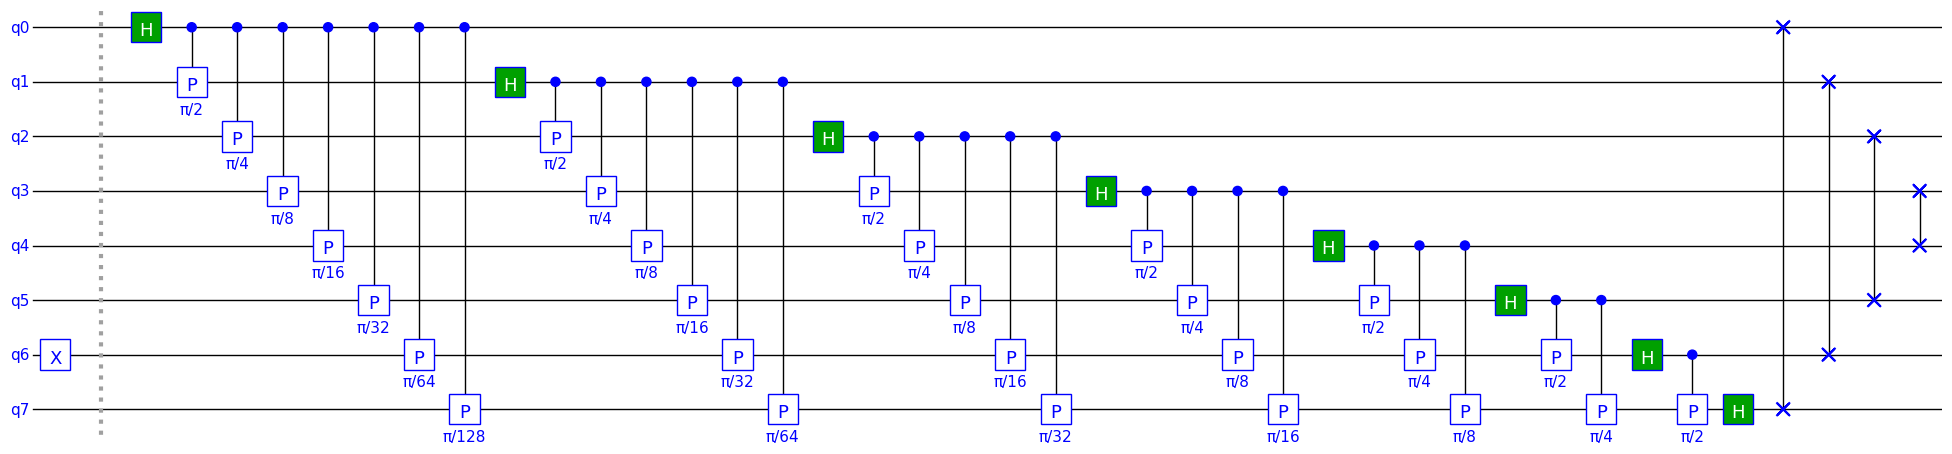

In [3]:
n = 8
qc = QCircuit(n)
qc.x(6)  # Initial state
qc.barrier()
qft(qc, n)
qc.draw()

Double-click in the schematic to zoom in and show scroll bars. Then click on the area to the left of the qubit numbers. This should expand the view vertically so that all qubits are visible. The horizontal scroll bar can then be used to explore the circuit.

### Print the results

We will print just the first and last few elements of state vector as it is quite long.

In [4]:
print(qc.format_state(mode='table', edge=3))

|00000000⟩  0.0625
|00000001⟩  (0.06242+0.00307j)
|00000010⟩  (0.0622+0.00613j)
...
|11111101⟩  (0.06182-0.00917j)
|11111110⟩  (0.0622-0.00613j)
|11111111⟩  (0.06242-0.00307j)


### N-Qubit Inverse QFT

As with the 4-qubit QFT in example 2, we can create an N-qubit inverse QFT by reversing the order of the gates and replacing each gate by its Hermitian conjugate:

In [5]:
def iqft(qc, n: int, start: int = 0):
    """ N-qubit inverse QFT starting at qubit index 'start'."""
    for i in range(n // 2 - 1, -1, -1):  # Reverse order of qubits
        qc.swap(start + i, start + n - i - 1)
    for i in range(n - 1, -1, -1):
        j = i + start
        for k in range(n - i - 1, 0, -1):
            qc.cp(-pi / 2 ** k, f'-{PI}/{2 ** k}', j, j + k)
        qc.h(j)

The following circuit shows a 8-qubit circuit with a 4-qubit QFT starting at qubit 2, followed by the inverse QFT.

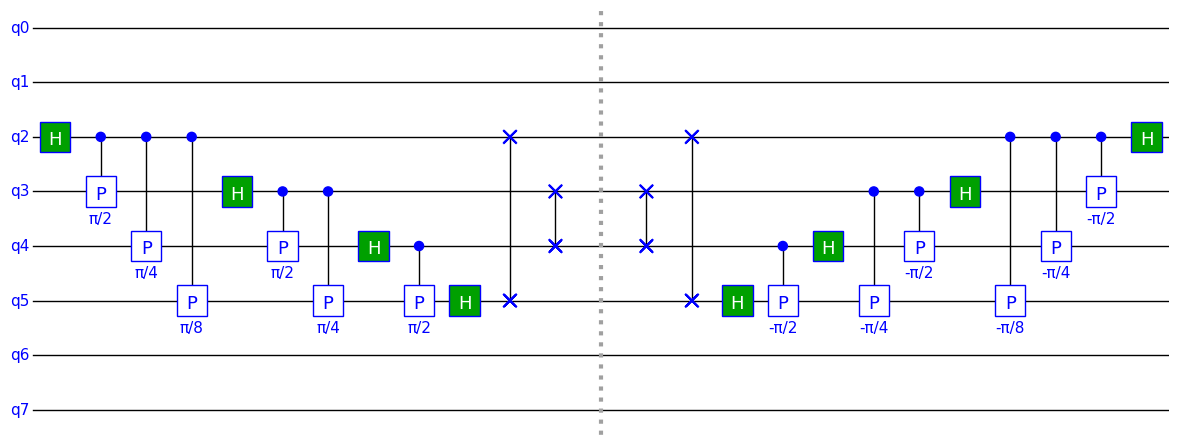

Result: True


In [6]:
n = 4  # Size of QFT
start = 2  # Index of first QFT qubit
qc = QCircuit(8, init='random')
initial_state = qc.state_vector
qft(qc, n, start)
qc.barrier()
iqft(qc, n, start)
qc.draw()
# Check that the result is the same as the initial state
print('Result:', np.allclose(qc.state_vector, initial_state))

This should print 'True', confirming that the inverse QFT undoes the effect of the fowrward QFT.

This example also shows how the parameters allow the QFT to be applied to a sub-range of the qubits.